# **ANN on Diamonds dataset**

**Given diamonds dataset and ANN model python notebook is given**

**Try different models and reduce the mean squared error** 

In [35]:
#importing libraries
import pandas as pd
import numpy as np

In [36]:
from google.colab import files
uploaded=files.upload()

Saving diamonds_new.csv to diamonds_new (1).csv


In [37]:
#reading dataset
data = pd.read_csv("diamonds_new.csv")

In [38]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [39]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [41]:
### handling null values
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [42]:
data.shape

(53940, 9)

In [43]:
import matplotlib.pyplot as plt

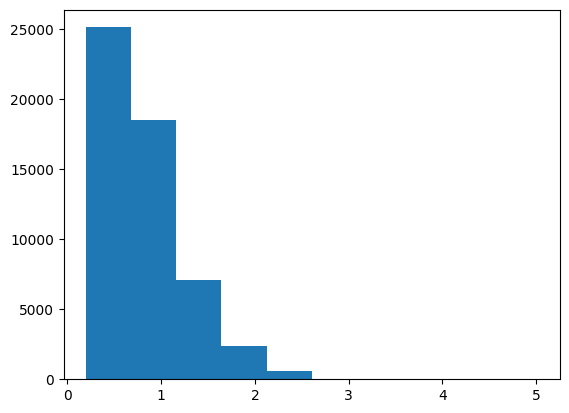

In [44]:
plt.hist(data['carat'])
plt.show()

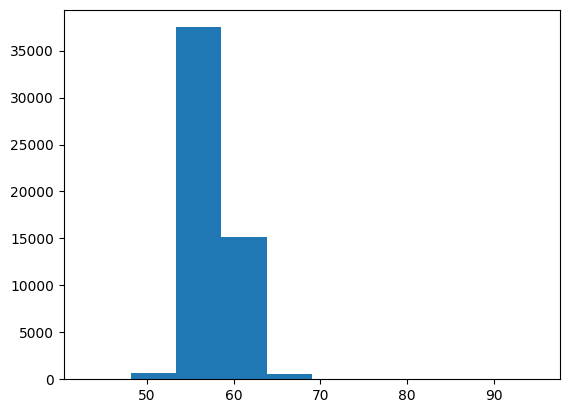

In [45]:
plt.hist(data['table'])
plt.show()

In [46]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


From the above details, we can see that the minimum value of x, y and z is 0, which is not possible. We need to findout the corresponding indexes and drop the same from the dataset

In [47]:
data[(data['x']==0) | (data['y']==0) | (data['z']==0)].index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [48]:
#dropping unnecessary data
data2 = data.drop([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557])

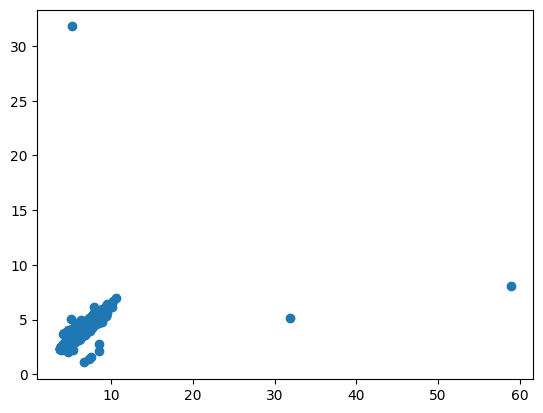

In [49]:
plt.scatter(data2['y'], data2['z'])
plt.show()

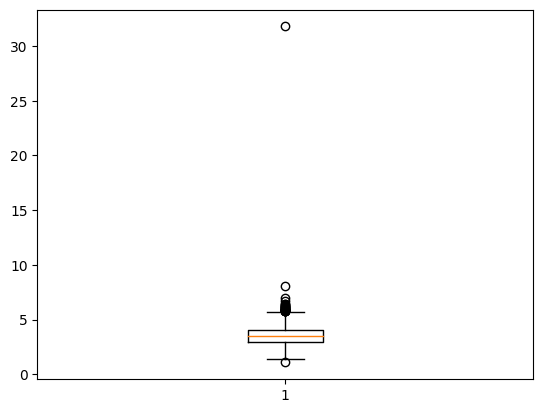

In [50]:
plt.boxplot(data2['z'])
plt.show()

From the above data, it is seen that the values more than 15 can be considered as extreme values. The extreme values can be dropped

In [51]:
data2[(data2['y'] > 15) | (data2['z'] > 15)].index

Int64Index([24067, 48410, 49189], dtype='int64')

In [52]:
#dropping indexes of extreme values
data3 = data2.drop([24067, 48410, 49189])

In [54]:
data3.shape

(53929, 9)

In [55]:
### fill the missing values

In [56]:
data3.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

As per the skewness, we are using meadian to fill the null values. For categorical fields, we will use mode value

In [57]:
car_median = data3['carat'].median()
data3['carat'] = data3['carat'].fillna(car_median)

In [58]:
car_table = data3['table'].median()
data3['table'] = data3['table'].fillna(car_table)

In [59]:
#finding mode
data3['color'].value_counts()

G    11234
E     9795
F     9539
H     8301
D     6774
I     5422
J     2808
Name: color, dtype: int64

In [60]:
#fill with G, the mode value
data3["color"] = data3['color'].fillna("G")

In [61]:
data3.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

Thus the null values are handled

In [62]:
data3.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [63]:
#splitting the dataset to features and Target
y = data3['price_new']
x = data3.drop("price_new", axis=1)

In [64]:
#one hot encoding for categorical values
x = pd.get_dummies(x)

In [65]:
#scaling of data using min max scaler
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [66]:
x = mn.fit_transform(x)

In [67]:
#splitting of dataset to test and train
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state= 134)

**Machine Learning model to find out Rsquared value and MSE value**

**Linear Regression Model**

In [69]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(y_test)

52279    1246.5
504      1411.0
47866     955.5
44043     774.0
21588    4847.0
          ...  
41519     617.5
38906     526.0
44067     775.5
11650    2527.5
11128    2469.5
Name: price_new, Length: 10786, dtype: float64


In [70]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is', mean_squared_error(y_test,predictions))
print('R squared value is', r2_score(y_test,predictions))

MSE is 310612.43175525905
R squared value is 0.9202615604010916


**Using Gradient Descent - ANN model**

In [71]:
from tensorflow.keras.models import Sequential

In [72]:
from tensorflow.keras.layers import Dense

In [73]:
x.shape

(53929, 25)

In [74]:
### input = 25, hidden1 = 32, hidden2 = 16, hidden3 = 8, output = 1

In [75]:
model1 = Sequential()
model1.add(Dense(32, activation = "relu", input_shape = (25,)))
model1.add(Dense(16, activation = "relu"))
model1.add(Dense(8, activation = "relu"))

model1.add(Dense(1, activation = None))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                832       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [76]:
### compile this model using stochiastic gradient descent

In [77]:
model1.compile(optimizer = "sgd", loss = "mean_squared_error")

In [78]:
#### train the weights using backpropogation algorithm

In [79]:
model1.fit(x_train, y_train, epochs = 10, batch_size = 128)

Epoch 1/10
338/338 [==============================] - 6s 3ms/step - loss: 1424771072.0000
Epoch 2/10
338/338 [==============================] - 1s 4ms/step - loss: 3998088.0000
Epoch 3/10
338/338 [==============================] - 1s 4ms/step - loss: 3998195.0000
Epoch 4/10
338/338 [==============================] - 1s 3ms/step - loss: 3998291.0000
Epoch 5/10
338/338 [==============================] - 1s 3ms/step - loss: 3998366.7500
Epoch 6/10
338/338 [==============================] - 1s 3ms/step - loss: 3998046.2500
Epoch 7/10
338/338 [==============================] - 1s 3ms/step - loss: 3997880.2500
Epoch 8/10
338/338 [==============================] - 1s 3ms/step - loss: 3998358.0000
Epoch 9/10
338/338 [==============================] - 1s 3ms/step - loss: 3998077.7500
Epoch 10/10
338/338 [==============================] - 1s 3ms/step - loss: 3997917.5000


In [80]:
#finding Mean squared error
model1.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 3895791.5000


3895791.5

**Gradient Descent- ANN-Model2**

In [81]:
model2 = Sequential()
model2.add(Dense(64, input_shape = (25,), activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(1, activation = None))

In [82]:
model2.compile(optimizer = "sgd", loss = "mean_squared_error")

In [85]:
model2.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 1s 3ms/step - loss: nan
Epoch 2/30
338/338 [==============================] - 1s 3ms/step - loss: nan
Epoch 3/30
338/338 [==============================] - 1s 3ms/step - loss: nan
Epoch 4/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 5/30
338/338 [==============================] - 2s 5ms/step - loss: nan
Epoch 6/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 7/30
338/338 [==============================] - 1s 3ms/step - loss: nan
Epoch 8/30
338/338 [==============================] - 1s 3ms/step - loss: nan
Epoch 9/30
338/338 [==============================] - 1s 3ms/step - loss: nan
Epoch 10/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 11/30
338/338 [==============================] - 1s 4ms/step - loss: nan
Epoch 12/30
338/338 [==============================] - 2s 5ms/step - loss: nan
Epoch 13/30
338/338 [==============================] - 1s 3ms

In [86]:
#finding Mean squared error
model2.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: nan


nan

**Gradient Descent- ANN-Model3**

In [87]:
model3 = Sequential()
model3.add(Dense(64, input_shape = (25,), activation = "sigmoid"))
model3.add(Dense(64, activation = "sigmoid"))
model3.add(Dense(64, activation = "sigmoid"))
model3.add(Dense(64, activation = "sigmoid"))
model3.add(Dense(64, activation = "sigmoid"))
model3.add(Dense(64, activation = "sigmoid"))
model3.add(Dense(64, activation = "sigmoid"))
model3.add(Dense(1, activation = None))

In [88]:
model3.compile(optimizer = "sgd", loss = "mean_squared_error")

In [89]:
model3.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 2s 3ms/step - loss: 4029239.2500
Epoch 2/30
338/338 [==============================] - 1s 3ms/step - loss: 4013052.2500
Epoch 3/30
338/338 [==============================] - 1s 4ms/step - loss: 4009954.2500
Epoch 4/30
338/338 [==============================] - 2s 5ms/step - loss: 4020600.5000
Epoch 5/30
338/338 [==============================] - 1s 3ms/step - loss: 4011478.2500
Epoch 6/30
338/338 [==============================] - 1s 3ms/step - loss: 4012791.5000
Epoch 7/30
338/338 [==============================] - 1s 3ms/step - loss: 4014553.5000
Epoch 8/30
338/338 [==============================] - 1s 3ms/step - loss: 4016986.2500
Epoch 9/30
338/338 [==============================] - 2s 5ms/step - loss: 4017104.5000
Epoch 10/30
338/338 [==============================] - 1s 4ms/step - loss: 4015168.5000
Epoch 11/30
338/338 [==============================] - 1s 3ms/step - loss: 4013738.2500
Epoch 12/30
338/338 [====================

In [90]:
#finding Mean squared error
model3.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 3945307.7500


3945307.75

**Gradient Descent- ANN-Model4 with loss function as binary cross entropy**

In [91]:
model4 = Sequential()
model4.add(Dense(64, input_shape = (25,), activation = "sigmoid"))
model4.add(Dense(64, activation = "sigmoid"))
model4.add(Dense(64, activation = "sigmoid"))
model4.add(Dense(64, activation = "sigmoid"))
model4.add(Dense(64, activation = "sigmoid"))
model4.add(Dense(64, activation = "sigmoid"))
model4.add(Dense(64, activation = "sigmoid"))
model4.add(Dense(1, activation = None))

In [93]:
model4.compile(optimizer = "sgd", loss = "binary_crossentropy")

In [94]:
model4.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 2s 4ms/step - loss: 30388.0977
Epoch 2/30
338/338 [==============================] - 1s 4ms/step - loss: 30388.0957
Epoch 3/30
338/338 [==============================] - 1s 4ms/step - loss: 30388.1133
Epoch 4/30
338/338 [==============================] - 1s 4ms/step - loss: 30388.0957
Epoch 5/30
338/338 [==============================] - 1s 3ms/step - loss: 30388.0977
Epoch 6/30
338/338 [==============================] - 1s 4ms/step - loss: 30388.0957
Epoch 7/30
338/338 [==============================] - 2s 7ms/step - loss: 30388.0918
Epoch 8/30
338/338 [==============================] - 2s 5ms/step - loss: 30388.0918
Epoch 9/30
338/338 [==============================] - 2s 5ms/step - loss: 30388.0898
Epoch 10/30
338/338 [==============================] - 1s 4ms/step - loss: 30388.0898
Epoch 11/30
338/338 [==============================] - 1s 3ms/step - loss: 30388.0918
Epoch 12/30
338/338 [==============================] - 1s 4ms/s

In [95]:
#finding Mean squared error
model4.evaluate(x_test, y_test)

338/338 [==============================] - 1s 3ms/step - loss: 30076.9316


30076.931640625

**Model 5 - ANN with Dropout to reduce overfitting**

In [97]:
from tensorflow.keras.layers import Dropout

In [98]:
model5 = Sequential()
model5.add(Dense(128, input_shape = (25,), activation = "relu"))
model5.add(Dense(128, activation = "relu"))
model5.add(Dropout(0.15))
model5.add(Dense(128, activation = "relu"))
model5.add(Dropout(0.15))
model5.add(Dense(64, activation = "relu"))
model5.add(Dropout(0.15))
model5.add(Dense(64, activation = "relu"))
model5.add(Dropout(0.15))
model5.add(Dense(32, activation = "relu"))
model5.add(Dense(16, activation = "relu"))
model5.add(Dense(1, activation = None))

In [99]:
model5.compile(optimizer = "adam", loss = "mean_squared_error")

In [100]:
model5.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 4s 4ms/step - loss: 1973220.6250
Epoch 2/30
338/338 [==============================] - 1s 4ms/step - loss: 220510.7500
Epoch 3/30
338/338 [==============================] - 1s 4ms/step - loss: 204905.5781
Epoch 4/30
338/338 [==============================] - 1s 4ms/step - loss: 197024.9531
Epoch 5/30
338/338 [==============================] - 2s 5ms/step - loss: 187856.4531
Epoch 6/30
338/338 [==============================] - 1s 4ms/step - loss: 184783.5469
Epoch 7/30
338/338 [==============================] - 1s 4ms/step - loss: 183340.3438
Epoch 8/30
338/338 [==============================] - 1s 4ms/step - loss: 188712.4844
Epoch 9/30
338/338 [==============================] - 1s 4ms/step - loss: 183564.4219
Epoch 10/30
338/338 [==============================] - 1s 4ms/step - loss: 177995.6094
Epoch 11/30
338/338 [==============================] - 1s 4ms/step - loss: 178927.4688
Epoch 12/30
338/338 [==============================

In [101]:
model5.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 293867.4688


293867.46875

**Model 6 - ANN with Dropout to reduce overfitting and activation as sigmoid**

In [102]:
model6 = Sequential()
model6.add(Dense(128, input_shape = (25,), activation = "sigmoid"))
model6.add(Dense(128, activation = "sigmoid"))
model6.add(Dropout(0.15))
model6.add(Dense(128, activation = "sigmoid"))
model6.add(Dropout(0.15))
model6.add(Dense(64, activation = "sigmoid"))
model6.add(Dropout(0.15))
model6.add(Dense(64, activation = "sigmoid"))
model6.add(Dropout(0.15))
model6.add(Dense(32, activation = "sigmoid"))
model6.add(Dense(16, activation = "sigmoid"))
model6.add(Dense(1, activation = None))

In [103]:
model6.compile(optimizer = "adam", loss = "mean_squared_error")

In [104]:
model6.fit(x_train, y_train, epochs = 30, batch_size = 128)

Epoch 1/30
338/338 [==============================] - 5s 5ms/step - loss: 7862423.5000
Epoch 2/30
338/338 [==============================] - 1s 4ms/step - loss: 7846296.5000
Epoch 3/30
338/338 [==============================] - 1s 4ms/step - loss: 7832626.0000
Epoch 4/30
338/338 [==============================] - 1s 4ms/step - loss: 7819245.5000
Epoch 5/30
338/338 [==============================] - 1s 4ms/step - loss: 7806010.0000
Epoch 6/30
338/338 [==============================] - 1s 4ms/step - loss: 7792825.5000
Epoch 7/30
338/338 [==============================] - 1s 4ms/step - loss: 7776883.0000
Epoch 8/30
338/338 [==============================] - 2s 4ms/step - loss: 7761184.0000
Epoch 9/30
338/338 [==============================] - 2s 5ms/step - loss: 7746304.0000
Epoch 10/30
338/338 [==============================] - 1s 4ms/step - loss: 7731499.5000
Epoch 11/30
338/338 [==============================] - 1s 4ms/step - loss: 7713536.0000
Epoch 12/30
338/338 [====================

In [105]:
model6.evaluate(x_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 7177315.5000


7177315.5

# **Results:**
As seen above, we can see that the model **Gradient Descent- ANN-Model4 with loss function as binary cross entropy** gave the least value of mean squared error parameter. The value is **30076.93**